In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
da_data = dict()
numnode = [16, 32, 64, 128]
time_cpp = dict()
for n in numnode:
    da_data[n] = []
    f = open("result/tp_2_%d.txt"%n,"r")
    for l in f:
        da_data[n].append(float(l)*n)
    f.close()

    time_cpp[n] = []
    f = open("result/time_cpp_2_%d.txt"%n,"r")
    for l in f:
        time_cpp[n].append(float(l)/10**(3))
print(len(time_cpp[16]))
print(len(time_cpp[32]))
print(len(time_cpp[64]))

# da_data[128] = []
# f1 = open("tp_da_128.txt", "r")
# for l in f1:
#     da_data[128].append(float(l))
# f1.close()

100
100
100


In [77]:
a2a_data = dict()
f = open("result_a2a.txt", "r")
for l in f:
    if l[0] == "n":
        data = l.split(" ")
        numnode = int(data[2])
        a2a_data[numnode] = []
    else:
        data = l.split("_")
        for i in data:
            a2a_data[numnode].append(float(i)*numnode)

for n in list(a2a_data.keys()):
    a2a_data[n] = a2a_data[n][:100]

f.close()

    

In [78]:
node_list = [16,32,64, 128]
throughput = []
node = []
topology = []
for n in node_list:
    # if n in [64,128]:
    len_data = len(da_data[n])
    throughput += da_data[n]
    node += [n for _ in range(len_data)]
    topology += ["Multigraph" for _ in range(len_data)]


    throughput += a2a_data[n][:len_data]
    node += [n for _ in range(len_data)]
    topology += ["Complete Graph" for _ in range(len_data)]
    # else:

    #     throughput += da_data[n]
    #     node += [n for _ in range(len(da_data[n]))]
    #     topology += ["Demand-aware" for _ in range(len(da_data[n]))]


    #     throughput += a2a_data[n]
    #     node += [n for _ in range(len(a2a_data[n]))]
    #     topology += ["Demand-oblivious" for _ in range(len(a2a_data[n]))]

/var/folders/n6/bkvv8nb946v4vpvrkq2ng6y00000gn/T/ipykernel_1440/2639414407.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(top=4000)


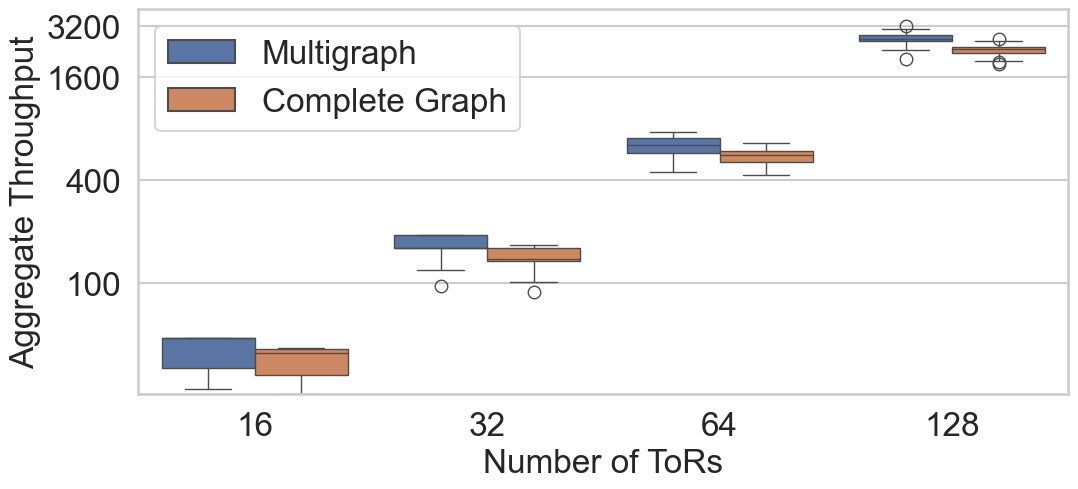

In [79]:
all_data_dict = {"Nodes" : node, "Throughput" : throughput, "Topology": topology}

all_df = pd.DataFrame(all_data_dict)


sns.set_theme(context="talk")
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# sns.boxplot(data=all_df, x="Nodes", y="Throughput", hue="Topology", inner="quart")
sns.boxplot(data=all_df, x="Nodes", y="Throughput", hue="Topology")



plt.legend(fontsize=24)
# plt.title('Decomposition runtime',fontsize=30)
plt.ylabel("Aggregate Throughput",fontsize=24)
plt.xlabel("Number of ToRs",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.yscale('log')

# Setting custom y-axis ticks
yticks = [0,100,400,1600,3200,6400]  # Example tick values, adjust as necessary
ytick_labels = [str(y) for y in yticks]  # Convert tick values to strings for labeling
plt.yticks(yticks, ytick_labels)

# xticks = [3,4,5,6,7,8,9,10]  # Example tick values, adjust as necessary
# xtick_labels = [str(y) for y in xticks]  # Convert tick values to strings for labeling
# plt.xticks(xticks, xtick_labels)

plt.ylim(top=4000)
# plt.xlim(left=3,right=10.5)


plt.savefig("tp.pdf")

/var/folders/n6/bkvv8nb946v4vpvrkq2ng6y00000gn/T/ipykernel_1440/1758075058.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='Nodes', y='Time', hue='Metric', ci=None, dodge=True)


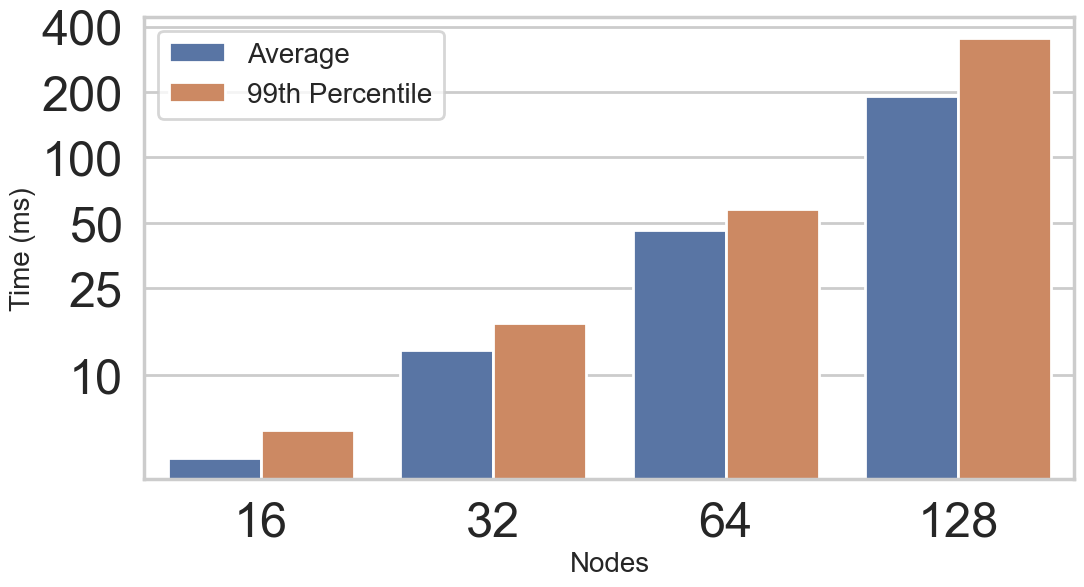

In [80]:
num_nodes = [16,32,64,128]
nodes = [i for i in num_nodes for _ in range(100)]
time = []
for n in num_nodes:
    time += time_cpp[n].copy()

time_dict = {"Nodes": nodes, "Time":time}
time_df = pd.DataFrame(time_dict)
# sns.violinplot(data=time_df,x="Nodes",y="Time")


# Calculate average and 99th percentile
avg_df = time_df.groupby(['Nodes'])['Time'].mean().reset_index()
p99_df = time_df.groupby(['Nodes'])['Time'].quantile(0.99).reset_index()

# Add a new column to distinguish between average and 99th percentile
avg_df['Metric'] = 'Average'
p99_df['Metric'] = '99th Percentile'

# Combine the two dataframes
combined_df = pd.concat([avg_df, p99_df])

# Plot
sns.set_theme(context="poster")
sns.set_style("whitegrid")
# sns.set_context("paper", font_scale=1)
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='Nodes', y='Time', hue='Metric', ci=None, dodge=True)
plt.legend(fontsize=20)
# plt.title('Decomposition runtime',fontsize=30)
plt.ylabel("Time (ms)",fontsize=20)
plt.xlabel("Nodes",fontsize=20)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

plt.yscale('log')


# Setting custom y-axis ticks
yticks = [10, 25,50,100, 200, 400]  # Example tick values, adjust as necessary
ytick_labels = [str(y) for y in yticks]  # Convert tick values to strings for labeling
plt.yticks(yticks, ytick_labels)

plt.savefig("time.png")
plt.show()

/var/folders/n6/bkvv8nb946v4vpvrkq2ng6y00000gn/T/ipykernel_1440/3855166793.py:64: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(top=17000)


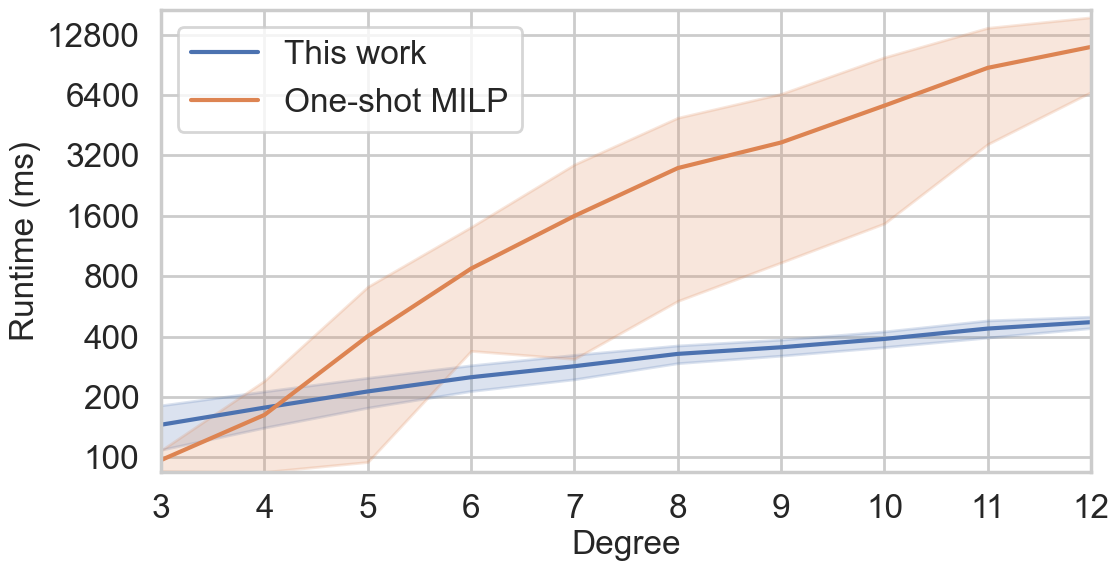

In [82]:
time_grab = []
time_all = []

x = []
for i in range(3,13):

    f = open("random_d/time_cpp_random_d_%dp_all.txt"%i,"r")
    temp_2 = []
    for l in f:
        temp_2.append(int(l)/10**3)
    time_all += temp_2.copy()
    # x += [i for _ in range(len(temp))]
    f.close()

    temp = []

    f = open("random_d/time_cpp_random_d_%dp.txt"%i,"r")
    for l in f:
        temp.append(int(l)/10**3)
    time_grab += temp.copy()
    f.close()

    x += [i for _ in range(len(temp))]


x+=x
type = []
type += ["This work" for i in range(len(time_grab))]

type += ["One-shot MILP" for i in range(len(time_all))]

data = {"time": time_grab + time_all, "degree":x, "type": type}

data_df = pd.DataFrame(data)




sns.set_theme(context="poster")
sns.set_style("whitegrid")
# sns.set_context("paper", font_scale=1)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=data_df, x="degree", y="time", hue="type", err_style="band", errorbar=("sd"),
)

plt.legend(fontsize=24)
# plt.title('Decomposition runtime',fontsize=30)
plt.ylabel("Runtime (ms)",fontsize=24)
plt.xlabel("Degree",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale('log')

# Setting custom y-axis ticks
yticks = [0,100, 200,400, 800,1600, 3200,6400, 12800]  # Example tick values, adjust as necessary
ytick_labels = [str(y) for y in yticks]  # Convert tick values to strings for labeling
plt.yticks(yticks, ytick_labels)

xticks = [3,4,5,6,7,8,9,10,11,12]  # Example tick values, adjust as necessary
xtick_labels = [str(y) for y in xticks]  # Convert tick values to strings for labeling
plt.xticks(xticks, xtick_labels)

plt.ylim(top=17000)
plt.xlim(left=3,right=12)

plt.savefig("time_compare.png")
plt.show()